In [1]:
import numpy as np
import pandas as pd 
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path1 = "drive/My Drive/GEN-sarc-notsarc.csv"
path2 = "drive/My Drive/HYP-sarc-notsarc.csv"
path3 = "drive/My Drive/RQ-sarc-notsarcc.csv"
df1 = pd.read_csv(path1, encoding='ISO-8859-1')
df2 = pd.read_csv(path1, encoding='ISO-8859-1')
df3 = pd.read_csv(path1, encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [4]:
df2.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [5]:
df3.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [6]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print(df1.count())
print(df2.count())
print(df3.count())


print(df.count())
df.head()

class    6520
id       6520
text     6520
dtype: int64
class    6520
id       6520
text     6520
dtype: int64
class    6520
id       6520
text     6520
dtype: int64
class    19560
id       19560
text     19560
dtype: int64


,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [7]:
df = df.dropna()
df = df.drop_duplicates()
df.count()

class    6520
id       6520
text     6520
dtype: int64

In [8]:
 df['label'] = df['class'].replace({ "notsarc": 0, "sarc":1})
df.head()


,class,id,text,label
0,notsarc,1,"If that's true, then Freedom of Speech is doom...",0
1,notsarc,2,Neener neener - is it time to go in from the p...,0
2,notsarc,3,"Just like the plastic gun fear, the armour pie...",0
3,notsarc,4,So geology is a religion because we weren't he...,0
4,notsarc,5,Well done Monty. Mark that up as your first ev...,0


In [9]:
df.drop(['class', 'id'], axis='columns', inplace=True)
df.head()

,text,label
0,"If that's true, then Freedom of Speech is doom...",0
1,Neener neener - is it time to go in from the p...,0
2,"Just like the plastic gun fear, the armour pie...",0
3,So geology is a religion because we weren't he...,0
4,Well done Monty. Mark that up as your first ev...,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, stratify=df['label'])

train_imbalanced = df
from sklearn.utils import resample
df_majority = df[df.label==0]
df_minority = df[df.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print("Before")
print(df.label.value_counts())
print("After")
print(df_upsampled.label.value_counts())

X_train, X_test, y_train, y_test = train_test_split(df_upsampled['text'], df_upsampled['label'], test_size=0.3, stratify=df_upsampled['label'])

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

Before
1    3260
0    3260
Name: label, dtype: int64
After
1    3260
0    3260
Name: label, dtype: int64


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
recall_arr = []
accuracy_arr = []
f1_arr = []

RF = RandomForestClassifier(n_estimators=10)
RF.fit(X=tf_train,y=y_train)

expected = y_test
predicted = RF.predict(tf_test)

print("Random Forest:")
print(metrics.classification_report(expected, predicted))
recall_arr.append(metrics.recall_score(expected, predicted))
accuracy_arr.append(metrics.accuracy_score(expected, predicted))
f1_arr.append(metrics.f1_score(expected, predicted))

Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       978
           1       0.77      0.76      0.76       978

    accuracy                           0.76      1956
   macro avg       0.76      0.76      0.76      1956
weighted avg       0.76      0.76      0.76      1956



Confusion Matrix:


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07d167bd10>)

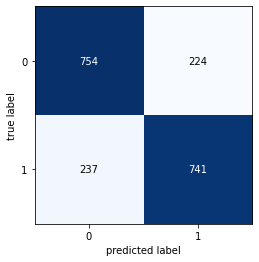

In [12]:
print("Confusion Matrix:")
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.metrics import Recall, FalseNegatives, Precision
from keras import Sequential

In [14]:
post=df_upsampled.text.values
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(post)

vocab_size=len(tokenizer.word_index)+1
encoded_docs=tokenizer.texts_to_sequences(post)
padded_sequence = pad_sequences(encoded_docs)

In [15]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy', Recall(), FalseNegatives(), Precision()])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           536032    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 552,683
Trainable params: 552,683
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
sentiment_label=df_upsampled['label'].to_numpy()
sentiment_label

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
history = model.fit(padded_sequence,
                    sentiment_label,
                    validation_split=0.2, 
                    epochs=4, 
                    batch_size=32)

Epoch 1/4
163/163 [==============================] - 27s 150ms/step - loss: 0.6467 - accuracy: 0.6253 - recall: 0.1417 - false_negatives: 795.8232 - precision: 0.4431 - val_loss: 0.7515 - val_accuracy: 0.6035 - val_recall: 0.6035 - val_false_negatives: 517.0000 - val_precision: 1.0000
Epoch 2/4
163/163 [==============================] - 24s 144ms/step - loss: 0.4650 - accuracy: 0.7907 - recall: 0.7284 - false_negatives: 272.0305 - precision: 0.7219 - val_loss: 0.8216 - val_accuracy: 0.6894 - val_recall: 0.6894 - val_false_negatives: 405.0000 - val_precision: 1.0000
Epoch 3/4
163/163 [==============================] - 24s 146ms/step - loss: 0.3495 - accuracy: 0.8550 - recall: 0.8167 - false_negatives: 193.7073 - precision: 0.8129 - val_loss: 0.6798 - val_accuracy: 0.7247 - val_recall: 0.7247 - val_false_negatives: 359.0000 - val_precision: 1.0000
Epoch 4/4
163/163 [==============================] - 24s 144ms/step - loss: 0.2760 - accuracy: 0.8970 - recall: 0.8667 - false_negatives: 137.

In [21]:
def predict(post):
  tw = tokenizer.texts_to_sequences([post]) #test_word
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  res = model.predict(tw)
  print(res)
  if prediction==1: print(post+"\t\t"+ str(prediction)+":"+"Sarcastic")
  else: print(post+"\t\t"+ str(prediction)+":"+"Not Sarcastic")

In [22]:
predict("Could i be anymore sarcastic");

[[0.8825269]]
Could i be anymore sarcastic		1:Sarcastic


In [26]:
predict("Aren't you little early for the meeting?");

[[0.72540843]]
Aren't you little early for the meeting?		1:Sarcastic


In [27]:
predict("That was an amzing move by congress!");

[[0.38536796]]
That was an amzing move by congress!		0:Not Sarcastic


In [28]:
predict("Tell me that you don't know something without telling me that you don't know something");

[[0.66032183]]
Tell me that you don't know something without telling me that you don't know something		1:Sarcastic


In [30]:
predict("then why is there such thing as original sin??? it's extremely hypocritical. from what you just said, sex is allowed, but it's also not allowed. emoticonxfrazzled");

[[0.00417423]]
then why is there such thing as original sin??? it's extremely hypocritical. from what you just said, sex is allowed, but it's also not allowed. emoticonxfrazzled		0:Not Sarcastic


In [32]:
predict("Bout to depression buy these OnlyFans while I’m in quarantine now")

[[0.5483511]]
Bout to depression buy these OnlyFans while I’m in quarantine now		1:Sarcastic


In [33]:
predict("That post season depression really hits DIFFERENT")

[[0.34618998]]
That post season depression really hits DIFFERENT		0:Not Sarcastic


In [34]:
predict("The waking up to no @premierleague depression is real")

[[0.48299527]]
The waking up to no @premierleague depression is real		0:Not Sarcastic


In [38]:
predict("Yes! I'm Prime minister")

[[0.6588853]]
Yes! I'm Prime minister		1:Sarcastic


In [36]:
predict("Thank you sherlock")

[[0.70857584]]
Thank you sherlock		1:Sarcastic


In [39]:
predict("Imagine dying from depression.")

[[0.70290864]]
Imagine dying from depression.		1:Sarcastic
